    R       
            
            
            
            
            
    Y       
    B       
    B       
    P     P 
    R     R 
Y Y Y     R 


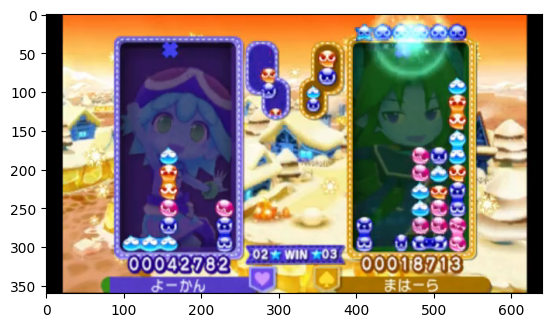

In [1]:
from FieldRecognition import FieldRecognition
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt
from PuyoInfo import puyo_red, puyo_blue, puyo_yellow, puyo_parpul, puyo_ozyama, puyo_green
field_recogniton = FieldRecognition(video_path='./resources/puyo_video.mp4', frame_index=16000)

puyo_green_hsv = cv2.cvtColor(puyo_green, cv2.COLOR_BGR2HSV)
puyo_red_hsv = cv2.cvtColor(puyo_red, cv2.COLOR_BGR2HSV)
puyo_yellow_hsv = cv2.cvtColor(puyo_yellow, cv2.COLOR_BGR2HSV)
puyo_parerpul_hsv = cv2.cvtColor(puyo_parpul, cv2.COLOR_BGR2HSV)
puyo_blue_hsv = cv2.cvtColor(puyo_blue, cv2.COLOR_BGR2HSV)
puyo_ozyama_hsv = cv2.cvtColor(puyo_ozyama, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(puyo_green_hsv)
hist_green = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_red_hsv)
hist_red = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_yellow_hsv)
hist_ywllow = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_parerpul_hsv)
hist_parerpul = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_blue_hsv)
hist_blue = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_ozyama_hsv)
hist_ozyama = cv2.calcHist([h], [0], None, [256], [0, 256])

field_hsv = cv2.cvtColor(field_recogniton.field_img, cv2.COLOR_BGR2HSV)
for row in reversed(field_recogniton.field_img_list):
    for i in range(6):
        puyo = row[i]
        puyo_hsv = cv2.cvtColor(puyo, cv2.COLOR_BGR2HSV)
        h,s,v = cv2.split(puyo_hsv)
        hist_h = cv2.calcHist([h], [0], None, [256], [0, 256])
        hist_s = cv2.calcHist([s], [0], None, [256], [0, 256])
        # print(hist_h)
        
        s_avg = np.mean(v)
        
        # method = cv2.HISTCMP_INTERSECT
        method = cv2.HISTCMP_CORREL
        rate_green = {'color': 'G', 'rate':cv2.compareHist(hist_h, hist_green, method)}
        rate_red = {'color': 'R', 'rate':cv2.compareHist(hist_h, hist_red, method)}
        rate_yellow = {'color': 'Y', 'rate':cv2.compareHist(hist_h, hist_ywllow, method)}
        rate_parepul = {'color': 'P', 'rate':cv2.compareHist(hist_h, hist_parerpul, method)}
        rate_blue = {'color': 'B', 'rate':cv2.compareHist(hist_h, hist_blue, method)}
        rate_ozyama = {'color': '■', 'rate':cv2.compareHist(hist_h, hist_ozyama, method)}

        rate_list = [rate_green, rate_red, rate_yellow, rate_parepul, rate_blue, rate_ozyama]
        color = max(rate_list, key=lambda x: x['rate'])
        # 彩度が130以下ならぷよ未配置
        if s_avg <= 130:
            print(' ', end=' ')
        else:
            print(color['color'], end=' ')
    print('')

fig = plt.figure()
plt.imshow(field_recogniton.field_img)
